### How to use 'stackforge' (preliminary name)


In [1]:
import stackforge
import numpy as np
import matplotlib.pyplot as plt

from plottery.plotutils import update_rcParams
update_rcParams() #fancy plots!

In [2]:
basePath = "/home/tnguser/sims.TNG/TNG100-3/output/"

/home/tnguser/examples/stackforge/src/helpers/binner.py:32: RuntimeWarning: invalid value encountered in divide
  prof = sum_w / counts
/home/tnguser/examples/stackforge/src/helpers/misc.py:80: RuntimeWarning: divide by zero encountered in log10
  temp = np.log10(temp)
/home/tnguser/examples/stackforge/src/stackforge.py:274: RuntimeWarning: invalid value encountered in multiply
  tSZ = ne * T
/home/tnguser/examples/stackforge/src/stackforge.py:275: RuntimeWarning: invalid value encountered in multiply
  rSZ = ne * T**2
/home/tnguser/examples/stackforge/src/helpers/binner.py:95: RuntimeWarning: invalid value encountered in divide
  prof = sum_w / counts


[Text(0.5, 0, 'R (ckpc)'), Text(0, 0.5, 'electron number density')]

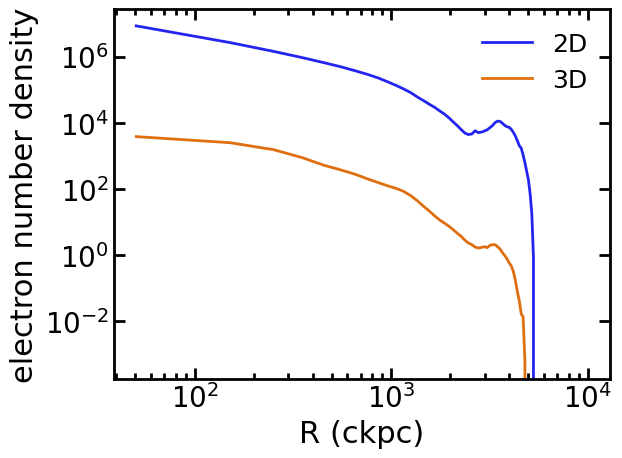

In [3]:
h = stackforge.halo(sim = "TNG", basePath = basePath, snapNum = 99, haloID = 0) 
R = np.linspace(0, 1e4, 100)
h.generate_profiles(R, projection = "2d", use_area = True, triax = True)
h.generate_profiles(R, projection = "3d", use_area = True, triax = True)
ne2d = h.profiles2D[0]
ne3d = h.profiles3D[0]
fig, ax = plt.subplots()
ax.loglog(h.R_centers, ne2d, label = "2D")
ax.loglog(h.R_centers, ne3d, label = "3D")
ax.legend(frameon = False)
ax.set(xlabel = "R (ckpc)", ylabel = "electron number density")

In [4]:
z = 0.
snap = stackforge.load_snap(basePath, redshift = z)

In [5]:
basePath = "/home/tnguser/sims.TNG/TNG100-3/output/"
redshifts = [0, 0.5, 1]
haloIDs = [i for i in range(30)]
R = np.linspace(0, 15000, 100)
for z in redshifts:
    snap = stackforge.load_snap(basePath, redshift = z)
    s = stackforge.stack(sim = "TNG", basePath = basePath, haloIDs = haloIDs, redshift=z, snap = snap)
    s.compute_1h2hprofiles(R, comoving = True, remove_h = True)
    s.save()

Processing halos:   0%|          | 0/30 [00:00<?, ?it/s]
KeyboardInterrupt

